[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/LoRaSONN/blob/main/Model/LoRaSONN.ipynb)

**LoRaSONN: A Novel Self-Operational Neural Network Learning Framework for RF-Fingerprint Identification of LoRa Devices**

**Coder: Surya Pratap Singh and Arka Roy**

**Github Profile: https://github.com/rsarka34**

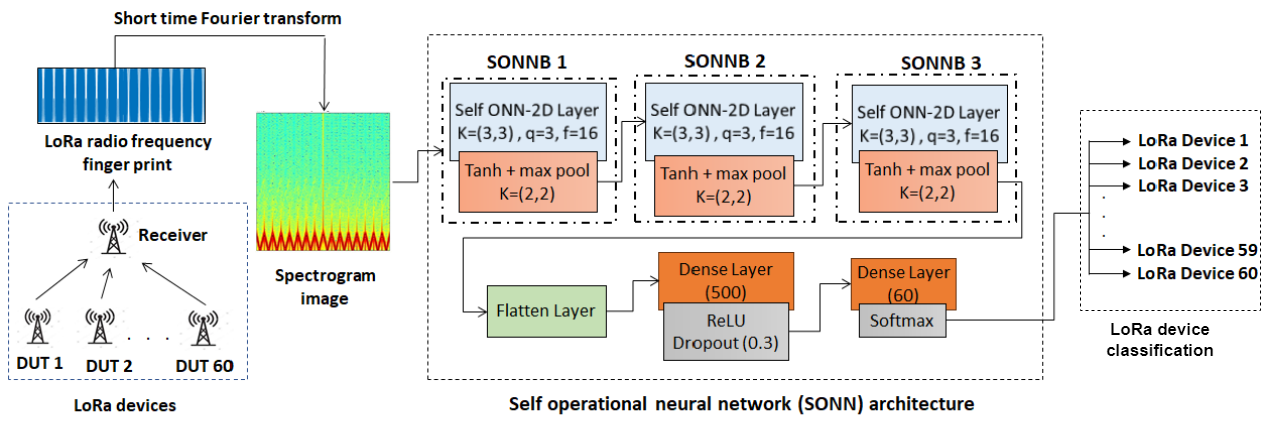

# **Loading Prerequisites**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf



import scipy.io
import tensorflow.keras.backend as K
# import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import layers
from tensorflow.keras.activations import gelu
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU

In [ ]:
!git clone https://github.com/junaidmalik09/fastonn.git
%cd /content/fastonn
!pip install .
import fastonn
from fastonn import SelfONN2d

fatal: destination path 'fastonn' already exists and is not an empty directory.
/content/fastonn
Processing /content/fastonn
  Preparing metadata (setup.py) ... done
  Created wheel for fastonn: filename=fastonn-0.1.1-py3-none-any.whl size=299578 sha256=23fb03ebacc4eaac8cc761cd92cfc6b966c640a10510037d825c78dcc77f701c
  Stored in directory: /tmp/pip-ephem-wheel-cache-y0nkt7al/wheels/61/8b/99/d8de1ae4507a27413aa8596d19e503645ccfdb3df60b239682
Successfully built fastonn
  Attempting uninstall: fastonn
    Found existing installation: fastonn 0.1.1
    Uninstalling fastonn-0.1.1:
      Successfully uninstalled fastonn-0.1.1


In [ ]:
dir(fastonn)

['F',
 'Function',
 'Iterable',
 'Module',
 'OpBlock',
 'OpNetwork',
 'OpTier',
 'Optional',
 'Parameter',
 'SelfONN',
 'SelfONN1d',
 'SelfONN2d',
 'SuperONN2d',
 'Tensor',
 'Trainer',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cat',
 'chirp',
 'cubic',
 'expp',
 'getOPLIB',
 'lincut',
 'logg',
 'math',
 'maxx',
 'medd',
 'mul',
 'myrelu',
 'nn',
 'no_grad',
 'osl',
 'randomshift',
 'repeat',
 'sinc',
 'sinc2',
 'sincs2',
 'sine',
 'sinh',
 'summ',
 'tanh',
 'tanh2',
 'torch',
 'trainer',
 'utils']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler

In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

136

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mat73
import mat73

# **Loading data**

## **Loading Pickle Files**

In [ ]:
import pickle
def load_pickle_file(name_of_file):
    infile = open(name_of_file,'rb')
    wgt = pickle.load(infile)
    infile.close()
    print('=========loading done=========')
    return wgt

audio2d_list= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/spectrogram_data')
# audio2d_list=np.reshape(audio2d_list,(audio2d_list.shape[0],audio2d_list.shape[1],audio2d_list.shape[2],1))
# audio2d_list.shape



Y_train= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/labels_lora')




=========loading done=========
=========loading done=========


In [ ]:
import pickle
def load_pickle_file(name_of_file):
    infile = open(name_of_file,'rb')
    wgt = pickle.load(infile)
    infile.close()
    print('=========loading done=========')
    return wgt

audio2d_list_residential= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/spectrogram_data_residential_devices')
# audio2d_list=np.reshape(audio2d_list,(audio2d_list.shape[0],audio2d_list.shape[1],audio2d_list.shape[2],1))
# audio2d_list.shape



Y_train_residential= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/labels_lora_residential_devices')


Y_train_residential

=========loading done=========
=========loading done=========


array(['dev31', 'dev31', 'dev31', ..., 'dev40', 'dev40', 'dev40'],
      dtype=object)

In [ ]:
import pickle
def load_pickle_file(name_of_file):
    infile = open(name_of_file,'rb')
    wgt = pickle.load(infile)
    infile.close()
    print('=========loading done=========')
    return wgt

audio2d_list_rogue= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/spectrogram_data_rogue_devices')
# audio2d_list=np.reshape(audio2d_list,(audio2d_list.shape[0],audio2d_list.shape[1],audio2d_list.shape[2],1))
# audio2d_list.shape



Y_train_rogue= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/labels_lora_rogue_devices')


Y_train_rogue

In [ ]:
import pickle
def load_pickle_file(name_of_file):
    infile = open(name_of_file,'rb')
    wgt = pickle.load(infile)
    infile.close()
    print('=========loading done=========')
    return wgt

audio2d_list_other= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/spectrogram_data_other_devices')
# audio2d_list=np.reshape(audio2d_list,(audio2d_list.shape[0],audio2d_list.shape[1],audio2d_list.shape[2],1))
# audio2d_list.shape



Y_train_other= load_pickle_file('/content/gdrive/MyDrive/LoRa/preprocessed_data/labels_lora_other_devices')


Y_train_other

=========loading done=========
=========loading done=========


array(['dev46', 'dev46', 'dev46', ..., 'dev60', 'dev60', 'dev60'],
      dtype=object)

## **DUTs 1-30**

In [ ]:
audio2d_list=np.array(audio2d_list)
audio2d_list=audio2d_list.astype(np.float64)
audio2d_list.dtype

dtype('float64')

In [ ]:

# audio2d_list_final=np.zeros((30000,112,112,1))

# for j in range(30):

#         audio2d_list_final[1000*j:1000*j+1000]=(audio2d_list[2500*j:(2500*j +1000)])
#         # audio2d_list_final[400*j+300:400*j+600]=(audio2d_list[2500*j+1000:(2500*j +1300)])
#         # audio2d_list_final[400*j+600:400*j+800]=(audio2d_list[2500*j+2000:(2500*j+2200)])

In [ ]:
# audio2d_list_final[400:700]==audio2d_list[400:700]

In [ ]:
# audio2d_list=audio2d_list_final

In [ ]:
Y_train_final=[]


for i in range (len(Y_train)):
      if Y_train[i]=='dev1':
        Y_train_final.append(0)
      elif Y_train[i]=='dev2':
        Y_train_final.append(1)
      elif Y_train[i]=='dev3':
        Y_train_final.append(2)
      elif Y_train[i]=='dev4':
        Y_train_final.append(3)
      elif Y_train[i]=='dev5':
        Y_train_final.append(4)
      elif Y_train[i]=='dev6':
        Y_train_final.append(5)
      elif Y_train[i]=='dev7':
        Y_train_final.append(6)
      elif Y_train[i]=='dev8':
        Y_train_final.append(7)
      elif Y_train[i]=='dev9':
        Y_train_final.append(8)
      elif Y_train[i]=='dev10':
        Y_train_final.append(9)
      elif Y_train[i]=='dev11':
        Y_train_final.append(10)
      elif Y_train[i]=='dev12':
        Y_train_final.append(11)
      elif Y_train[i]=='dev13':
        Y_train_final.append(12)
      elif Y_train[i]=='dev14':
        Y_train_final.append(13)
      elif Y_train[i]=='dev15':
        Y_train_final.append(14)
      elif Y_train[i]=='dev16':
        Y_train_final.append(15)
      elif Y_train[i]=='dev17':
        Y_train_final.append(16)
      elif Y_train[i]=='dev18':
        Y_train_final.append(17)
      elif Y_train[i]=='dev19':
        Y_train_final.append(18)
      elif Y_train[i]=='dev20':
        Y_train_final.append(19)
      elif Y_train[i]=='dev21':
        Y_train_final.append(20)
      elif Y_train[i]=='dev22':
        Y_train_final.append(21)
      elif Y_train[i]=='dev23':
        Y_train_final.append(22)
      elif Y_train[i]=='dev24':
        Y_train_final.append(23)
      elif Y_train[i]=='dev25':
        Y_train_final.append(24)
      elif Y_train[i]=='dev26':
        Y_train_final.append(25)
      elif Y_train[i]=='dev27':
        Y_train_final.append(26)
      elif Y_train[i]=='dev28':
        Y_train_final.append(27)
      elif Y_train[i]=='dev29':
        Y_train_final.append(28)
      elif Y_train[i]=='dev30':
        Y_train_final.append(29)



# Y_train_final=np.array(Y_train_final)


In [ ]:
X=audio2d_list
print(X.shape)

print(X.dtype)

X=np.reshape(X,(75000,112,112))
X=np.reshape(X,(75000,1,112,112))
X.shape

(75000, 112, 112, 1)
float64


(75000, 1, 112, 112)

In [ ]:
# Y_train_new=np.zeros((30000,))

# for j in range(30):

#         Y_train_new[1000*j:1000*j+1000]   = (Y_train_final[2500*j:(2500*j +1000)])
#         # Y_train_new[400*j+300:400*j+600]=(Y_train_final[2500*j+1000:(2500*j +1300)])
#         # Y_train_new[400*j+600:400*j+800]=(Y_train_final[2500*j+2000:(2500*j+2200)])

In [ ]:
# Y_train_final=Y_train_new

In [ ]:
# Y_train_final=np.array(Y_train_final)
# Y_train_final=Y_train_final.astype(np.int64)
# print(Y_train_final.shape)
# Y_train_final

## **DUTs 31-40**

In [ ]:
Y_train_final_residential=[]


for i in range (len(Y_train_residential)):

      if Y_train_residential[i]=='dev31':
        Y_train_final_residential.append(30)

      elif Y_train_residential[i]=='dev32':
        Y_train_final_residential.append(31)

      elif Y_train_residential[i]=='dev33':
        Y_train_final_residential.append(32)

      elif Y_train_residential[i]=='dev34':
        Y_train_final_residential.append(33)

      elif Y_train_residential[i]=='dev35':
        Y_train_final_residential.append(34)

      elif Y_train_residential[i]=='dev36':
        Y_train_final_residential.append(35)

      elif Y_train_residential[i]=='dev37':
        Y_train_final_residential.append(36)

      elif Y_train_residential[i]=='dev38':
        Y_train_final_residential.append(37)

      elif Y_train_residential[i]=='dev39':
        Y_train_final_residential.append(38)

      elif Y_train_residential[i]=='dev40':
        Y_train_final_residential.append(39)




# Y_train_final_1_to_10=np.array(Y_train_final_1_to_10)


In [ ]:
X_residential=audio2d_list_residential
print(X_residential.shape)

print(X_residential.dtype)


X_residential=np.reshape(X_residential,(4000,1,112,112))
X_residential.shape

(4000, 112, 112, 1)
float64


(4000, 1, 112, 112)

In [ ]:
# Y_train_final_residential=np.array(Y_train_final_residential)
# Y_train_final_residential=Y_train_final_residential.astype(np.int64)
# print(Y_train_final_residential.shape)
# Y_train_final_residential

## **DUTs 41-45**

In [ ]:
Y_train_final_rogue=[]


for i in range (len(Y_train_rogue)):

      if Y_train_rogue[i]=='dev41':
        Y_train_final_rogue.append(40)

      elif Y_train_rogue[i]=='dev42':
        Y_train_final_rogue.append(41)

      elif Y_train_rogue[i]=='dev43':
        Y_train_final_rogue.append(42)

      elif Y_train_rogue[i]=='dev44':
        Y_train_final_rogue.append(43)

      elif Y_train_rogue[i]=='dev45':
        Y_train_final_rogue.append(44)





# Y_train_final_1_to_10=np.array(Y_train_final_1_to_10)


In [ ]:
X_rogue=audio2d_list_rogue
print(X_rogue.shape)

print(X_rogue.dtype)


X_rogue=np.reshape(X_rogue,(1000,1,112,112))
X_rogue.shape

(1000, 112, 112, 1)
float64


(1000, 1, 112, 112)

In [ ]:
# Y_train_final_rogue=np.array(Y_train_final_rogue)
# Y_train_final_rogue=Y_train_final_rogue.astype(np.int64)
# print(Y_train_final_rogue.shape)
# Y_train_final_rogue

## **DUTs 46-60**

In [ ]:
Y_train_final_other=[]


for i in range (len(Y_train_other)):


      if Y_train_other[i]== 'dev46':
        Y_train_final_other.append(45)

      elif Y_train_other[i]=='dev47':
        Y_train_final_other.append(46)

      elif Y_train_other[i]=='dev48':
        Y_train_final_other.append(47)

      elif Y_train_other[i]=='dev49':
        Y_train_final_other.append(48)

      elif Y_train_other[i]=='dev50':
        Y_train_final_other.append(49)

      elif Y_train_other[i]=='dev51':
        Y_train_final_other.append(50)

      elif Y_train_other[i]=='dev52':
        Y_train_final_other.append(51)

      elif Y_train_other[i]=='dev53':
        Y_train_final_other.append(52)

      elif Y_train_other[i]=='dev54':
        Y_train_final_other.append(53)

      elif Y_train_other[i]=='dev55':
        Y_train_final_other.append(54)

      elif Y_train_other[i]=='dev56':
        Y_train_final_other.append(55)

      elif Y_train_other[i]=='dev57':
        Y_train_final_other.append(56)

      elif Y_train_other[i]=='dev58':
        Y_train_final_other.append(57)

      elif Y_train_other[i]=='dev59':
        Y_train_final_other.append(58)

      elif Y_train_other[i]=='dev60':
        Y_train_final_other.append(59)



# Y_train_final_other=np.array(Y_train_final_other)


In [ ]:
audio2d_list_other=audio2d_list_other.astype(np.float64)
audio2d_list_other.dtype

dtype('float64')

In [ ]:
X_other=audio2d_list_other
print(X_other.shape)

print(X_other.dtype)


X_other=np.reshape(X_other,(6000,1,112,112))
X_other.shape

(6000, 112, 112, 1)
float64


(6000, 1, 112, 112)

In [ ]:
# Y_train_final_other=np.array(Y_train_final_other)
# Y_train_final_other=Y_train_final_other.astype(np.int64)
# print(Y_train_final_other.shape)
# Y_train_final_other

## **DUTs 1-60**

In [ ]:
Y_train_final_total=[]


Y_train_final_total=Y_train_final+Y_train_final_residential+Y_train_final_rogue+Y_train_final_other

Y_train_final_total=np.array(Y_train_final_total,dtype=object)

In [ ]:
# Y_train_final_total=[]


# Y_train_final_total=Y_train_final+Y_train_new+Y_train_final_rogue+Y_train_final_other

# Y_train_final_total=np.array(Y_train_final_total,dtype=object)

In [ ]:
# Y_train_final_total=[]


# Y_train_final_total=Y_train_final+Y_train_new

# Y_train_final_total=np.array(Y_train_final_total,dtype=object)


In [ ]:
audio2d_list_total=[]

for i in range (75000):
    audio2d_list_total.append(audio2d_list[i])

for i in range (4000):
    audio2d_list_total.append(audio2d_list_residential[i])


for i in range (1000):
    audio2d_list_total.append(audio2d_list_rogue[i])


for i in range (6000):
    audio2d_list_total.append(audio2d_list_other[i])

len(audio2d_list_total)

86000

In [ ]:
# audio2d_list_total=[]

# for i in range (75000):
#     audio2d_list_total.append(audio2d_list[i])

# for i in range (4000):
#     audio2d_list_total.append(audio2d_list_residential[i])


# # for i in range (1000):
# #     audio2d_list_total.append(audio2d_list_rogue[i])


# # for i in range (6000):
# #     audio2d_list_total.append(audio2d_list_other[i])

# len(audio2d_list_total)

In [ ]:
# audio2d_list_total[84999]==audio2d_list_other[4999]

In [ ]:
audio2d_list_total=np.array(audio2d_list_total)

In [ ]:
Y_train_final_total

array([0, 0, 0, ..., 59, 59, 59], dtype=object)

In [ ]:
Y_train_final_total=Y_train_final_total.astype(np.int32)
print(Y_train_final_total.shape)
Y_train_final_total
type(Y_train_final_total)

(86000,)


numpy.ndarray

In [ ]:
audio2d_list_total=np.array(audio2d_list_total)
audio2d_list_total=audio2d_list_total.astype(np.float64)
audio2d_list_total.dtype
type(audio2d_list_total)

numpy.ndarray

In [ ]:
X_total=audio2d_list_total
print(X_total.shape)

print(X_total.dtype)


X_total=np.reshape(X_total,(86000,1,112,112))
X_total.shape

(86000, 112, 112, 1)
float64


(86000, 1, 112, 112)

# **Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
def create_datasets(X, Y, test_size=0.15,seed=None):
    X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=0.1,random_state=seed)
    print(y_test.shape)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.1,random_state=seed)
    X_train, X_valid, X_test = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid, X_test)]
    y_train, y_valid, y_test = [torch.tensor(arr, dtype=torch.long) for arr in (y_train, y_valid, y_test)]

    train_ds = TensorDataset(X_train, y_train)
    valid_ds = TensorDataset(X_valid, y_valid)
    test_ds= TensorDataset(X_test, y_test)
    return train_ds, valid_ds, test_ds


In [ ]:
def create_loaders(train_ds, valid_ds, test_ds, bs, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    test_dl = DataLoader(test_ds, bs, shuffle=False, num_workers=jobs)
    return train_dl, valid_dl,test_dl

In [ ]:
print('Preparing datasets')
trn_ds, val_ds, tst_ds = create_datasets(X_total,Y_train_final_total,seed=25)

Preparing datasets
(8600,)


In [ ]:
print('Preparing datasets')
# trn_ds_1_to_10, val_ds_1_to_10, tst_ds_1_to_10, = create_datasets(X_1_to_10,Y_train_final_1_to_10,seed=25)

Preparing datasets


In [ ]:
# print('Preparing datasets')
# trn_ds_residential, val_ds_residential, tst_ds_residential, = create_datasets(X_residential,Y_train_final_residential,seed=25)

In [ ]:
# print('Preparing datasets')
# trn_ds_other, val_ds_other, tst_ds_other = create_datasets(X_other,Y_train_final_other,seed=25)

In [ ]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl,tst_dl = create_loaders(trn_ds, val_ds,tst_ds, bs)

Creating data loaders with batch size: 128


In [ ]:
# bs = 128
# print(f'Creating data loaders with batch size: {bs}')
# trn_dl_seen, val_dl_seen,tst_dl_seen = create_loaders(trn_ds_seen, val_ds_seen,tst_ds_seen, bs)

In [ ]:
# bs = 128
# print(f'Creating data loaders with batch size: {bs}')
# trn_dl_residential, val_dl_residential,tst_dl_residential = create_loaders(trn_ds_residential, val_ds_residential,tst_ds_residential, bs)

In [ ]:
# bs = 128
# print(f'Creating data loaders with batch size: {bs}')
# trn_dl_other, val_dl_other,tst_dl_other = create_loaders(trn_ds_other, val_ds_other,tst_ds_other, bs)

# **Model and Training**

In [ ]:
from torchsummary import summary

In [ ]:
class ONNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.onnv1 = nn.Sequential(
            SelfONN2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv2 = nn.Sequential(
             SelfONN2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv3 = nn.Sequential(
            SelfONN2d(
                in_channels=32,
                out_channels=32,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(32 *  12* 12, 500)  # Adjust the input size
        self.relu = nn.ELU()
        self.dropout = nn.Dropout(p=0.4)
        self.linear2 = nn.Linear(500, 60)
        self.output_l = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.onnv1(input_data)
        x = self.onnv2(x)
        x = self.onnv3(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        logits = self.linear2(x)
        predictions = self.output_l(logits)
        return logits

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = ONNNetwork().to(device)
summary(model, (1, 112, 112))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         SelfONN2d-1         [-1, 16, 110, 110]             448
              Tanh-2         [-1, 16, 110, 110]               0
         MaxPool2d-3           [-1, 16, 55, 55]               0
         SelfONN2d-4           [-1, 32, 53, 53]          13,856
              Tanh-5           [-1, 32, 53, 53]               0
         MaxPool2d-6           [-1, 32, 26, 26]               0
         SelfONN2d-7           [-1, 32, 24, 24]          27,680
              Tanh-8           [-1, 32, 24, 24]               0
         MaxPool2d-9           [-1, 32, 12, 12]               0
          Flatten-10                 [-1, 4608]               0
           Linear-11                  [-1, 500]       2,304,500
              ELU-12                  [-1, 500]               0
          Dropout-13                  [-1, 500]               0
           Linear-14                   

In [ ]:
!pip install pthflops

In [ ]:
from pthflops import count_ops

# Create a network and a corresponding input

model = ONNNetwork().to(device)

inp = torch.rand(1,1,112,112).to(device)

# Count the number of FLOPs
count_ops(model, inp)

Operation OPS       
--------  --------  
onnv1_2   145200    
onnv2_2   64896     
onnv3_2   13824     
linear1   2304500   
linear2   30060     
-------   -------   
Input size: (1, 1, 112, 112)
2,558,480 FLOPs or approx. 0.00 GFLOPs


(2558480,
 [['onnv1_2', 145200],
  ['onnv2_2', 64896],
  ['onnv3_2', 13824],
  ['linear1', 2304500],
  ['linear2', 30060]])

In [ ]:

lr = 0.003
# lr = 0.002

n_epochs = 50
iterations_per_epoch = len(trn_dl)

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)


print('Start model training')

for epoch in range(1, n_epochs + 1):
    correct, total = 0, 0
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.cuda()
        y_batch = y_batch.cuda()
        opt.zero_grad()
        out_tr = model(x_batch)
        loss =  criterion(out_tr, y_batch)
        preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds_tr == y_batch).sum().item()
        loss.backward()
        opt.step()
    trainloss_history.append(loss)
    train_acc = correct / total
    trainacc_history.append(train_acc)
    with torch.no_grad():
        model.eval()
        correct, total = 0, 0
        for x_val, y_val in (val_dl):
            x_val=x_val.cuda()
            y_val = y_val.cuda()
            out_vl = model(x_val)
            valid_loss = criterion(out_vl, y_val)
            preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
            total += y_val.size(0)
            correct += (preds == y_val).sum().item()
    valloss_history.append(valid_loss)
    valid_acc = correct / total
    valacc_history.append(valid_acc)
    print(f'Epoch: {epoch:3d}. Training Loss: {loss:.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}')


Start model training
Epoch:   1. Training Loss: 1.0325. Validation Loss: 0.9993. Training Acc.: 44.57%  Validation Acc.: 67.02%
Epoch:   2. Training Loss: 0.5676. Validation Loss: 0.5082. Training Acc.: 73.58%  Validation Acc.: 83.94%
Epoch:   3. Training Loss: 0.4678. Validation Loss: 0.4688. Training Acc.: 83.64%  Validation Acc.: 87.08%
Epoch:   4. Training Loss: 0.4107. Validation Loss: 0.2231. Training Acc.: 89.41%  Validation Acc.: 90.03%
Epoch:   5. Training Loss: 0.0371. Validation Loss: 0.2757. Training Acc.: 92.50%  Validation Acc.: 89.33%
Epoch:   6. Training Loss: 0.2496. Validation Loss: 0.3936. Training Acc.: 93.94%  Validation Acc.: 91.50%
Epoch:   7. Training Loss: 0.2171. Validation Loss: 0.3720. Training Acc.: 94.63%  Validation Acc.: 92.84%
Epoch:   8. Training Loss: 0.0437. Validation Loss: 0.2847. Training Acc.: 95.13%  Validation Acc.: 92.56%
Epoch:   9. Training Loss: 0.0720. Validation Loss: 0.2368. Training Acc.: 95.57%  Validation Acc.: 93.62%
Epoch:  10. Trai

Text(0.5, 0, 'Epochs')

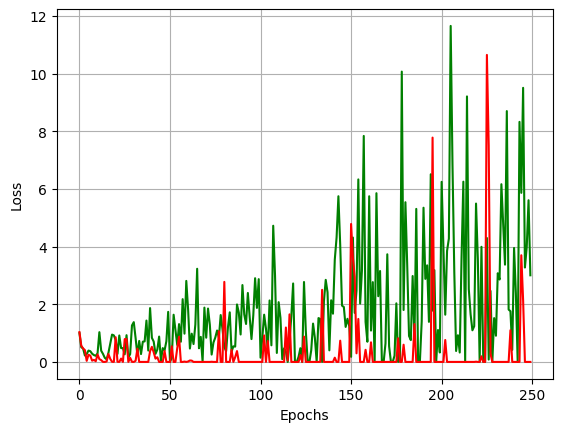

In [ ]:
val_loss=torch.tensor(valloss_history,device = 'cpu')
val_loss_np=val_loss.numpy()
train_loss=torch.tensor(trainloss_history,device = 'cpu')
train_loss_np=train_loss.numpy()
plt.plot(val_loss_np,'g');plt.plot(train_loss_np,'r');plt.grid();
plt.ylabel('Loss');plt.xlabel('Epochs')
plt.title("Loss")


Text(0.5, 1.0, 'Onn Validation Accuracy')

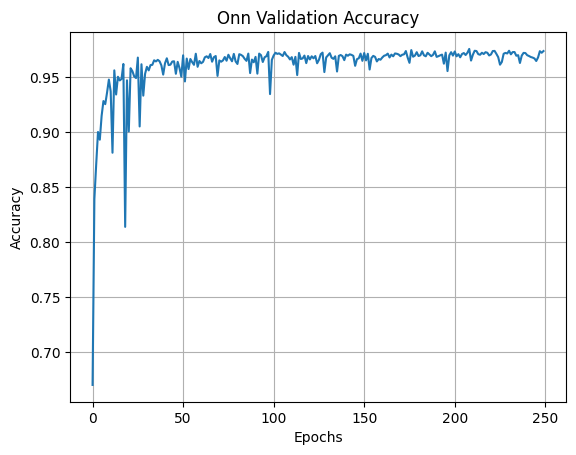

In [ ]:
valid_acch=np.array(valacc_history)
plt.plot(valid_acch);plt.grid();
plt.ylabel('Accuracy');plt.xlabel('Epochs')
plt.title("Onn Validation Accuracy")

In [ ]:
import torch
import matplotlib.pyplot as plt


val_loss_file = '/content/gdrive/MyDrive/LoRa/text_files/val_loss_ONN.txt'
train_loss_file = '/content/gdrive/MyDrive/LoRa/text_files/train_loss_ONN.txt'


with open(val_loss_file, 'w') as f:
    for loss in val_loss_np:
        f.write(str(loss) + '\n')

with open(train_loss_file, 'w') as f:
    for loss in train_loss_np:
        f.write(str(loss) + '\n')

# Plotting code (if needed)
plt.plot(val_loss_np, 'g')
plt.plot(train_loss_np, 'r')
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


In [ ]:
val_accuracy_file = '/content/gdrive/MyDrive/LoRa/text_files/val_acc_ONN.txt'
train_accuracy_file = '/content/gdrive/MyDrive/LoRa/text_files/train_acc_ONN.txt'

# Save validation accuracy values to a text file
with open(val_accuracy_file, 'w') as f:
    f.write("Epoch\tValidation Accuracy\n")
    for epoch, val_acc in enumerate(val_acch, 1):
        f.write(f"{epoch}\t{val_acc}\n")

# Save testing accuracy values to a text file
with open(train_accuracy_file, 'w') as f:
    f.write("Epoch\tTraining Accuracy\n")
    for epoch, train_acc in enumerate(train_acch, 1):
        f.write(f"{epoch}\t{train_acc}\n")

# **Training**

In [ ]:
# '''PATH= "/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/onn_entire_model.pt"
# torch.save(model, PATH)'''

In [ ]:
# torch.save(model.state_dict(), '/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_28jun2023.pth')

In [ ]:
# state_dict = torch.load('/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_28jun2023.pth')

In [ ]:
# model.load_state_dict(state_dict)


<All keys matched successfully>

In [ ]:
state_dict = torch.load('/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_8sep2023.pth')

In [ ]:
model.load_state_dict(state_dict)


<All keys matched successfully>

In [ ]:
# torch.save(model.state_dict(), '/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_8sep2023.pth')

### **Fewer packets(400)**

In [ ]:
# torch.save(model.state_dict(), '/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_8aug2023.pth')

In [ ]:
# state_dict = torch.load('/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_8aug2023.pth')

In [ ]:
# model.load_state_dict(state_dict)

### **Fewer packets(800)**

In [ ]:
# torch.save(model.state_dict(), '/content/gdrive/MyDrive/LoRa/trained_models/ONN_models/onn_model_best_8aug_2023.pth')

# **Testing**

In [ ]:

def final_labelling(labels_file):

    labels_final=[]

    for i in range(len(labels_file)):
        labels_final.append("dev" + str(labels_file[i]+1))

    # labels_final=np.array(labels_final).astype(object)
    return labels_final

In [ ]:
class_names=[]

class_names=np.unique(Y_train_final)

class_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
class_names_total=[]

class_names_total=np.unique(Y_train_final_total)

class_names_total

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int32)

In [ ]:
class_names_1_to_10=[]

class_names_1_to_10=np.unique(Y_train_final_1_to_10)

class_names_1_to_10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
class_names_residential=[]

class_names_residential=np.unique(Y_train_final_residential)

class_names_residential

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [ ]:
class_names_other=[]

class_names_other=np.unique(Y_train_final_other)

class_names_other

array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

In [ ]:
# class_names_total_list=class_names_total.tolist()


class_names_total_list=final_labelling(class_names_total)


from sklearn.metrics import classification_report
target_names = class_names_total_list
print(classification_report(y_true,y_pred, target_names=target_names,digits=4))

              precision    recall  f1-score   support

        dev1     0.9707    0.9667    0.9687       240
        dev2     0.9008    0.9712    0.9347       243
        dev3     0.9960    0.9730    0.9844       259
        dev4     0.9872    0.9914    0.9893       233
        dev5     0.9957    0.9872    0.9914       234
        dev6     0.9704    0.9887    0.9794       265
        dev7     0.9912    0.9739    0.9825       230
        dev8     0.9615    0.9615    0.9615       234
        dev9     0.9745    0.9926    0.9835       270
       dev10     0.9815    0.9593    0.9703       221
       dev11     0.9962    0.9743    0.9851       272
       dev12     0.9913    0.9828    0.9870       232
       dev13     0.9880    0.9764    0.9822       254
       dev14     0.9929    0.9860    0.9894       285
       dev15     0.9625    0.9483    0.9554       271
       dev16     0.9789    0.9587    0.9687       242
       dev17     0.9828    0.9913    0.9870       230
       dev18     0.9875    

In [ ]:
# class_names_total_list=class_names_total.tolist()


class_names_total_list=final_labelling(class_names_total)


from sklearn.metrics import classification_report
target_names = class_names_total_list
print(classification_report(y_true,y_pred, target_names=target_names))

              precision    recall  f1-score   support

        dev1       0.97      0.97      0.97       240
        dev2       0.99      0.95      0.97       243
        dev3       0.97      0.98      0.97       259
        dev4       0.97      0.99      0.98       233
        dev5       0.99      0.99      0.99       234
        dev6       1.00      0.97      0.98       265
        dev7       0.92      0.97      0.95       230
        dev8       0.94      0.97      0.96       234
        dev9       0.99      0.94      0.96       270
       dev10       0.99      0.97      0.98       221
       dev11       0.97      0.99      0.98       272
       dev12       0.99      0.97      0.98       232
       dev13       0.97      0.98      0.97       254
       dev14       1.00      0.99      0.99       285
       dev15       0.98      0.96      0.97       271
       dev16       0.98      0.97      0.97       242
       dev17       0.99      0.97      0.98       230
       dev18       0.98    

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = []
y_pred = []

#model.load_state_dict(torch.load('/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/onn_scatter.pth'))

model.eval()
for x_test, y_tst in (tst_dl_seen):
    x_test=x_test.cuda()
    out_test = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;
cm=confusion_matrix(y_true,y_pred)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')
cm_norm=confusion_matrix(y_true,y_pred,normalize='true')


false=0
true=0

for i in range(len(y_true)):
    if y_true[i]==y_pred[i]:
        true=true+1
    else:
        false=false+1

print(true)
print(false)

# cm_df_norm = pd.DataFrame(cm_norm,
#                      index = class_names_residential,
#                      columns = class_names_residential)


# plt.figure(figsize=(65,12))
# sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
# plt.title('Normalised Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = []
y_pred = []

#model.load_state_dict(torch.load('/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/onn_scatter.pth'))

model.eval()
for x_test, y_tst in (tst_dl):
    x_test=x_test.cuda()
    out_test = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;
cm=confusion_matrix(y_true,y_pred)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')
cm_norm=confusion_matrix(y_true,y_pred,normalize='true')


# print(true/(true+false))

# cm_df_norm = pd.DataFrame(cm_norm,
#                      index = class_names_total,
#                      columns = class_names_total)

# # plt.subplot(122)
# plt.figure(figsize=(65,12))
# sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
# plt.title('Normalised Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

Test accuracy is = 97.0%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true_residential = []
y_pred_residential = []

#model.load_state_dict(torch.load('/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/onn_scatter.pth'))
# model=torch.load(PATH)
model.eval()
for x_test, y_tst in (tst_dl_residential):
    x_test=x_test.cuda()
    out_test = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred_residential.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true_residential.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;



false_1=0
true_1=0

for i in range(len(y_true_residential)):
    if y_true_residential[i]==y_pred_residential[i]:
        true_1=true_1+1
    else:
        false_1=false_1+1

print(true_1)
print(false_1)
# index=[]

# for i in range (len(y_pred_residential)):
#     if y_pred_residential[i]==6:
#         index.append(i)


# for j in range (len(y_pred_residential)):
#     if y_pred_residential[j]==20:
#        index.append(j)

# # print (index)

# del y_true_residential[294]
# del y_true_residential[361]
# del y_true_residential[164]

# element_to_remove = 6

# y_pred_residential = [x for x in y_pred_residential if x != element_to_remove]

# element_to_remove_2 = 20

# y_pred_residential = [x for x in y_pred_residential if x != element_to_remove_2]


cm=confusion_matrix(y_true_residential,y_pred_residential)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')

cm_norm_residential=confusion_matrix(y_true_residential,y_pred_residential,normalize='true')


# cm_df_norm = pd.DataFrame(cm_norm_residential,
#                      index = class_names_residential,
#                      columns = class_names_residential)



# plt.figure(figsize=(25,6))
# sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
# plt.title('Normalised Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

70
2330
Test accuracy is = 2.9166666666666665%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = []
y_pred = []

#model.load_state_dict(torch.load('/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/onn_scatter.pth'))

model.eval()
for x_test, y_tst in (tst_dl_other):
    x_test=x_test.cuda()
    out_test = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;
cm=confusion_matrix(y_true,y_pred)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')
cm_norm=confusion_matrix(y_true,y_pred,normalize='true')



# cm_df = pd.DataFrame(cm,
#                      index = class_names,
#                      columns = class_names)

# plt.subplot(121)
# sns.heatmap(cm_df,annot=True,cmap="Blues")
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')

cm_df_norm = pd.DataFrame(cm_norm,
                     index = class_names_other,
                     columns = class_names_other)

# plt.subplot(122)
plt.figure(figsize=(65,12))
sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
plt.title('Normalised Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
    from sklearn.metrics import confusion_matrix
    import sklearn
    cm=confusion_matrix(y_true,y_pred)
    print('Confusion Matrix');
    # print(cm)
    precision = sklearn.metrics.precision_score(y_true,y_pred,average=None)
    print('precision==   '+str(precision))
    accuracy=np.diag(cm).sum()/cm.sum().sum()
    print('Accuracy==    '+str(accuracy))
    recall = sklearn.metrics.recall_score(y_true,y_pred,average=None)
    print('Recall==      '+str(recall))
    F1 = sklearn.metrics.f1_score(y_true,y_pred,average=None)
    print('F1-Score==    '+str(F1))
    K_cappa = sklearn.metrics.cohen_kappa_score(y_true,y_pred)
    print('Kcappa==      '+str(K_cappa))

Confusion Matrix
precision==   [0.97095436 0.99145299 0.97307692 0.97058824 0.98717949 0.99612403
 0.9218107  0.9382716  0.98828125 0.98617512 0.9676259  0.98689956
 0.96511628 0.9964539  0.97744361 0.9790795  0.99111111 0.98347107
 0.992      0.94779116 0.95833333 0.96356275 0.97142857 0.99227799
 0.98353909 0.98467433 0.9509434  0.97131148 0.97080292 0.99574468
 1.         1.         1.         0.78       1.         1.
 1.         1.         0.97619048 0.97222222 1.         1.
 1.         1.         1.         0.53658537 0.74468085 0.65714286
 0.41025641 0.71111111 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
Accuracy==    0.9675581395348837
Recall==      [0.975      0.95473251 0.97683398 0.99141631 0.98717949 0.96981132
 0.97391304 0.97435897 0.93703704 0.96832579 0.98897059 0.97413793
 0.98031496 0.98596491 0.95940959 0.96694215 0.96956522 0.97942387
 0.992      0.98333333 0.95112782 0.97142857 0.98755187 0.98467433
 0.9958

In [ ]:
# torch.save(model.state_dict(), '/content/gdrive/MyDrive/LoRa/Asthma_classification/ONN_Results/onn_model_best_31jan2023.pth')

# **TSNE Embedding plot**

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
model.linear1.register_forward_hook(get_activation('linear1'))
bs = 137
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl,tst_dl = create_loaders(trn_ds, val_ds,tst_ds, bs)
FEATS = []
y_true = []
# placeholder for batch features
features = {}
for x_tst, y_tst in tst_dl:
    xtst_batches = x_tst.cuda()
    out = model(xtst_batches)
    print('IP TENSOR shape:',xtst_batches.shape)
    fea=activation['linear1'].data.cpu().numpy()
    print('feature tensor shape:',fea.shape)
    FEATS.append(fea)
    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth

FEATS = np.concatenate(FEATS)
y_true=np.array(y_true)
print('feats shape:', FEATS.shape)
print('label shape:', y_true.shape)

Creating data loaders with batch size: 137
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor shape: (137, 500)
IP TENSOR shape: torch.Size([137, 1, 112, 112])
feature tensor sha

In [ ]:
import seaborn as sns;
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import pandas as pd
from sklearn.manifold import TSNE
tsne = TSNE()
def scatter(x1, labels):
    # We create a scatter plot.
    plt.figure(figsize=(10,8))
    data=x1
    sns.scatterplot(data=x1,x=data[:,0], y=data[:,1], hue=labels)

In [ ]:
xtst_batches_arr=xtst_batches.data.cpu().numpy()
xtst_batches_arr_re=np.reshape(xtst_batches_arr,(106,112*112))
test_tsne_embeds = tsne.fit_transform(xtst_batches_arr_re)
scatter(test_tsne_embeds,y_true)
plt.title('Raw training instances embedding')

In [ ]:
len(test_tsne_embeds[:,0])

In [ ]:
xtst_batches_arr.shape

(102, 1, 112, 112)

In [ ]:

def final_labelling(labels_file):

    labels_final=[]

    for i in range(len(labels_file)):
        labels_final.append("dev" + str(labels_file[i]+1))

    # labels_final=np.array(labels_final).astype(object)
    return labels_final

In [ ]:
y_true_final=[]

y_true_final=final_labelling(y_true)


print(y_true)
print(y_true_final)
np.unique(y_true_final)

[15  7  9 ... 20 14 27]
['dev16', 'dev8', 'dev10', 'dev24', 'dev22', 'dev60', 'dev23', 'dev1', 'dev15', 'dev1', 'dev25', 'dev30', 'dev21', 'dev30', 'dev10', 'dev12', 'dev18', 'dev27', 'dev57', 'dev24', 'dev27', 'dev21', 'dev10', 'dev14', 'dev58', 'dev51', 'dev42', 'dev53', 'dev38', 'dev17', 'dev26', 'dev5', 'dev46', 'dev23', 'dev25', 'dev21', 'dev4', 'dev3', 'dev9', 'dev12', 'dev15', 'dev43', 'dev23', 'dev27', 'dev21', 'dev3', 'dev22', 'dev15', 'dev22', 'dev10', 'dev29', 'dev17', 'dev9', 'dev20', 'dev9', 'dev25', 'dev28', 'dev2', 'dev53', 'dev17', 'dev12', 'dev15', 'dev30', 'dev8', 'dev6', 'dev6', 'dev23', 'dev7', 'dev26', 'dev27', 'dev7', 'dev27', 'dev19', 'dev10', 'dev4', 'dev11', 'dev20', 'dev18', 'dev3', 'dev29', 'dev16', 'dev24', 'dev25', 'dev8', 'dev21', 'dev15', 'dev3', 'dev1', 'dev13', 'dev5', 'dev39', 'dev14', 'dev29', 'dev30', 'dev11', 'dev34', 'dev28', 'dev25', 'dev20', 'dev10', 'dev11', 'dev37', 'dev9', 'dev24', 'dev2', 'dev39', 'dev20', 'dev30', 'dev1', 'dev17', 'dev12', '

array(['dev1', 'dev10', 'dev11', 'dev12', 'dev13', 'dev14', 'dev15',
       'dev16', 'dev17', 'dev18', 'dev19', 'dev2', 'dev20', 'dev21',
       'dev22', 'dev23', 'dev24', 'dev25', 'dev26', 'dev27', 'dev28',
       'dev29', 'dev3', 'dev30', 'dev31', 'dev32', 'dev33', 'dev34',
       'dev35', 'dev36', 'dev37', 'dev38', 'dev39', 'dev4', 'dev40',
       'dev41', 'dev42', 'dev43', 'dev44', 'dev45', 'dev46', 'dev47',
       'dev48', 'dev49', 'dev5', 'dev50', 'dev51', 'dev52', 'dev53',
       'dev54', 'dev55', 'dev56', 'dev57', 'dev58', 'dev59', 'dev6',
       'dev60', 'dev7', 'dev8', 'dev9'], dtype='<U5')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


Text(0.5, 1.0, 'Raw ONN embeddings')

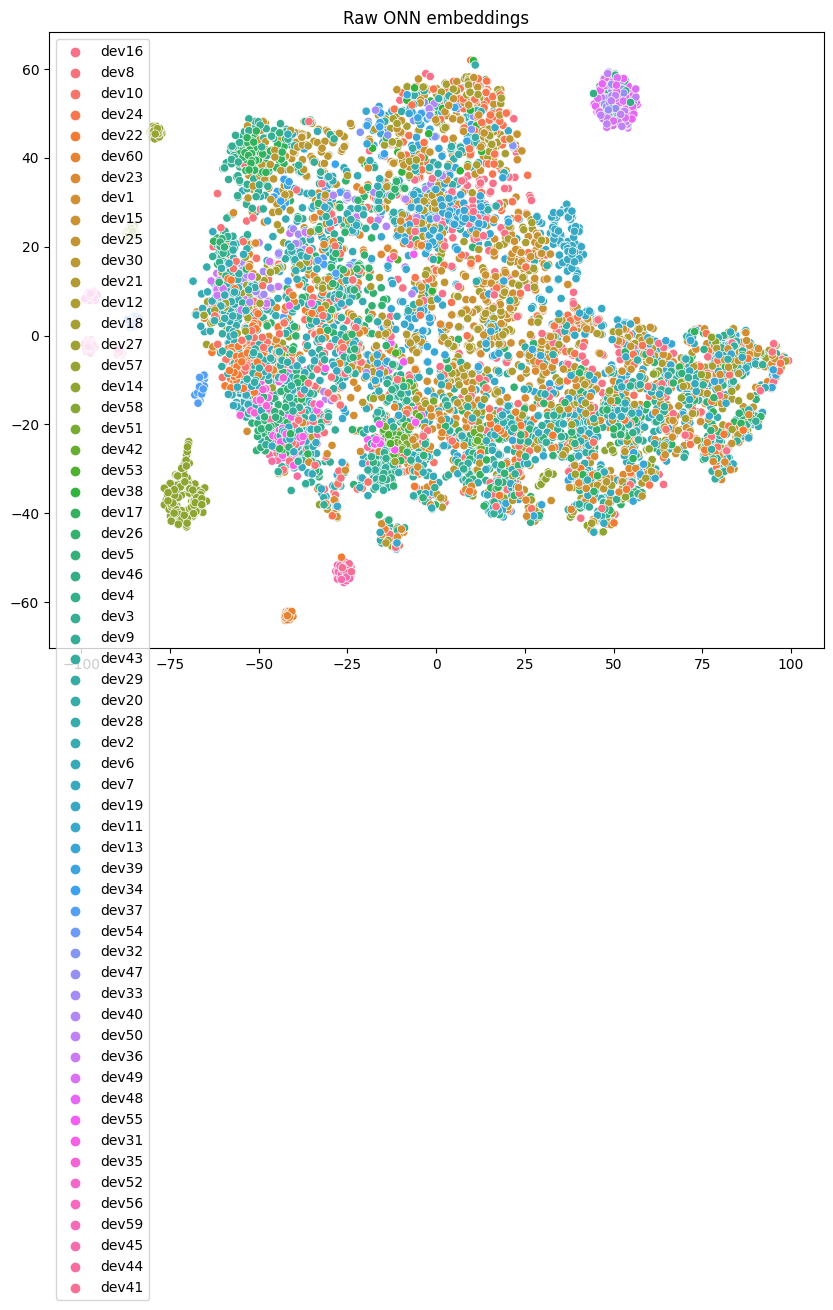

In [ ]:
test_tsne_embeds = tsne.fit_transform(FEATS)
scatter(test_tsne_embeds,y_true_final)
plt.title('Raw ONN embeddings')

In [ ]:
np.savetxt('/content/gdrive/MyDrive/LoRa/text_files/ONN_raw_tsne_emds.txt',test_tsne_embeds)
np.savetxt('/content/gdrive/MyDrive/LoRa/text_files/ONN_raw_tsne_labels.txt',y_true)

Text(0.5, 1.0, 'ONN embeddings DUT 1-60')

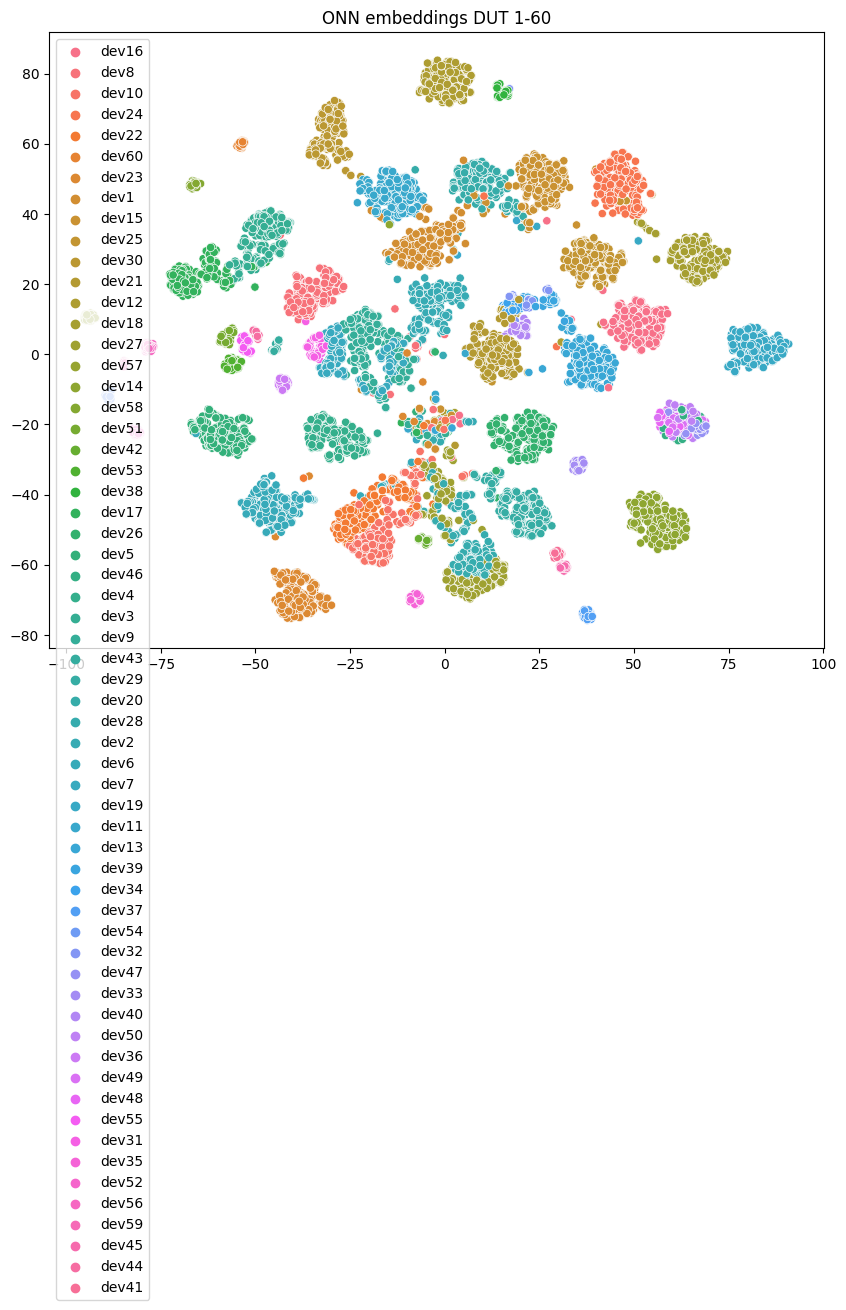

In [ ]:
test_tsne_embeds = tsne.fit_transform(FEATS)
scatter(test_tsne_embeds,y_true_final)
plt.title('ONN embeddings DUT 1-60')

In [ ]:
# np.savetxt('/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/ONN_tsne_emds.txt',test_tsne_embeds)
# np.savetxt('/content/gdrive/MyDrive/ARKA/Asthma_classification/ONN_Results/ONN_tsne_labels.txt',y_true)

In [ ]:
np.savetxt('/content/gdrive/MyDrive/LoRa/text_files/ONN_tsne_emds.txt',test_tsne_embeds)
np.savetxt('/content/gdrive/MyDrive/LoRa/text_files/ONN_tsne_labels.txt',y_true)